# Project 1 [14 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
dataset 

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

## Part 1: Getting started [4 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? 30
* What are the target classes? 0 and 1
* What do these target classes signify? indicates if the breast cancer is Malignant(0) or Benign(1)
* How many participants tested `Malignant`? 212
* How many participants tested `Benign`? 357

In [ ]:
### YOUR CODE HERE ###
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
print(df.head(10))
print('# columns including target column',len(df.columns))
print(df.groupby(['target']).count())



   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0
5        12.45         15.70  ...                  0.12440       0
6        18.25         19.98  ...                  0.08368       0
7        13.71         20.83  ...                  0.11510       0
8        13.00         21.82  ...                  0.10720       0
9        12.46         24.04  ...                  0.20750       0

[10 rows x 31 columns]
# columns including target column 31
        mean radius  mean texture  ...  worst symmetry  worst fractal dimension
target                             ...                                         
0               212           212  ...    

Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[1]**
data for different features are shown below

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Why? **[1]** The scales are standardized and easier to comprehend because we have performed data standarzation for the two columns. The distribution of data remain unchanged.

It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however). To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data that you provided. Split the dataset into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[1]**

**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


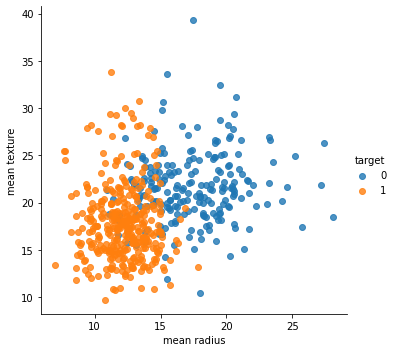

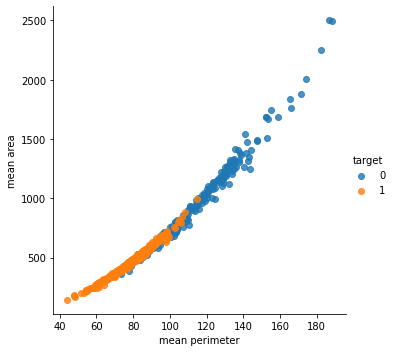

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns
a = sns.lmplot(x="mean radius", y="mean texture", hue='target',data=df,fit_reg=False)
b = sns.lmplot(x="mean perimeter", y="mean area", hue='target',data=df,fit_reg=False)

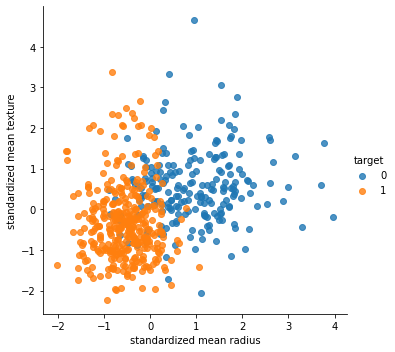

In [ ]:
meanradius_mean= df['mean radius'].mean()
meanradius_std= df['mean radius'].std()
meantexture_mean=df['mean texture'].mean()
meantexture_std=df['mean texture'].std()
df['standardized mean radius'] = (df['mean radius'] - meanradius_mean)/meanradius_std
df['standardized mean texture'] = (df['mean texture'] - meantexture_mean)/meantexture_std
standardized_a = sns.lmplot(x="standardized mean radius", y="standardized mean texture", hue='target',data=df,fit_reg=False)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)


AttributeError: ignored

## Part 2: KNN Classifier without Standardization [3 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? Comment on  which `k`s lead to underfitted or overfitted models. **[1]** 
      
      for k = 10 and 11 the accuracy is at maximum of 93.46%. for K less than 10 is overfitting(high variance & low bias), and larger than 11 is underfitting(low variance & high bias)
3.   Can you get the same accuracy (roughly) with fewer features using a KNN model? You're free to use trial-and-error to remove features (try at least 5 combinations), or use a more sophisticated approach like [Backward Elimination](https://towardsdatascience.com/backward-elimination-for-feature-selection-in-machine-learning-c6a3a8f8cef4). 
Describe your findings using a graph or table (or multiple!). **[1]**

After conducting backward elimination by dropping one feature at a time, It is observable that the original one was the best.(with all features). It is notable that validation accuracy didnt not change when dropping 1 until 27 features.

,K,accuracy
9,10,0.934652
10,11,0.934652
6,7,0.932152
7,8,0.932152
11,12,0.932120
13,14,0.929684
2,3,0.927215
3,4,0.927120
5,6,0.924652
15,16,0.924620


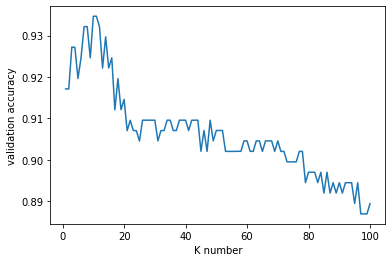

In [ ]:
### YOUR CODE HERE ###
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
acc =[]
#acc1=[]#
k = []
for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy = cross_val_score(knn, X_train, y_train, cv=5)
 # accuracy1 = accuracy_score(y_test, knn.predict(X_test)) #
  acc.append(accuracy.mean())
  #acc1.append(accuracy1.mean())
  k.append(i)
plt.xlabel('K number')
plt.ylabel('validation accuracy')
plt.plot(k,acc)
#plt.plot(k,acc1)

df2 = pd.DataFrame(list(zip(k, acc)),columns=['K','accuracy'])
sorted_df2 = df2.sort_values("accuracy", ascending=False)
sorted_df2.head(20)


highest accuracy: 0.9346518987341772
column name dropped: mean texture
highest accuracy: 0.9346518987341772
column name dropped: mean perimeter
highest accuracy: 0.9346518987341772
column name dropped: mean compactness
highest accuracy: 0.9346518987341772
column name dropped: mean concavity
highest accuracy: 0.9346518987341772
column name dropped: mean concave points
highest accuracy: 0.9346518987341772
column name dropped: mean symmetry
highest accuracy: 0.9346518987341772
column name dropped: mean fractal dimension
highest accuracy: 0.9346518987341772
column name dropped: radius error
highest accuracy: 0.9346518987341772
column name dropped: texture error
highest accuracy: 0.9346518987341772
column name dropped: perimeter error
highest accuracy: 0.9346518987341772
column name dropped: area error
highest accuracy: 0.9346518987341772
column name dropped: compactness error
highest accuracy: 0.9346518987341772
column name dropped: concavity error
highest accuracy: 0.9346518987341772
colu

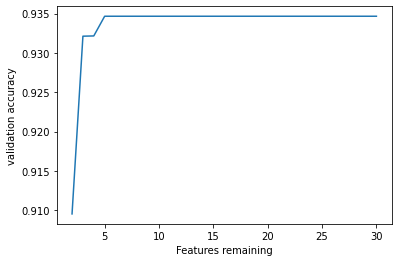

In [ ]:
#Backward Eliminationg: drop one feature at a time that results in highest validation accuracy.
#plot shows number of features remaining vs highest accuracy
num_fea = 30
max_acc_a = []
num_fea_a = []
for j in range (29):
  max_max_acc = []
  for i in range(num_fea):
    max_acc = []
    X1 = df.drop(columns=['target',df.columns[i]])
    y1 = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
           X1, y1, test_size=0.3, random_state=0)
    for k in range(1,30):
      acc = []
      #k_value = []
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train,y_train)
      accuracy = cross_val_score(knn, X_train, y_train, cv=5)
      acc.append(accuracy.mean())
      #k_value.append(k)
      max_acc.append(max(acc))
    max_max_acc.append(max(max_acc))
  i_drop = max_max_acc.index(max(max_max_acc))
  max_acc_a.append(max(max_max_acc))
  num_fea_a.append(num_fea)
  print('highest accuracy:',max(max_max_acc))
  df = df.drop(columns = [df.columns[i_drop]])
  print('column name dropped:',df.columns[i_drop])
  num_fea += -1
plt.xlabel('Features remaining')
plt.ylabel('validation accuracy')
plt.plot(num_fea_a,max_acc_a)

## Part 3: Standardization [2 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

Note: When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Create a KNN classifier with standardized data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)), and reproduce all steps in Part 2. **[1]**

2. Does standardization lead to better model performance? Is performance better or worst? Discuss. **[1]**
**96.74 validation accuracy at k=10 **
Standardization has resulted in a higher validation accuracy and thus better model performance. The reason for this improvement is because before standardization, the predictor variables have significantly different ranges and there is a high chance that some features dominate the model. After standardization, all features are unit independent and will yield a better result.


In [ ]:
print(X_scaled.mean(axis=0))
X_scaled.std(axis=0)

[-2.26033597e-15 -1.38917353e-16  2.35657390e-15 -6.37680863e-16
 -1.38219977e-15  1.27393210e-16  1.33129130e-15  5.70035365e-16
 -3.81436926e-15 -1.68081629e-15 -2.55239715e-16  2.64445082e-16
 -4.59989389e-16  2.78950509e-17  2.15684533e-15  5.95140910e-16
  4.56641983e-16  3.30416878e-16 -1.38917353e-16  1.17466059e-15
  1.02346942e-15 -6.34333457e-16 -1.92699011e-15 -1.60675493e-16]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

,K,accuracy
9,10,0.967437
6,7,0.964937
7,8,0.964937
10,11,0.964905
11,12,0.962405
13,14,0.962405
2,3,0.962373
3,4,0.962373
12,13,0.959905
8,9,0.959842


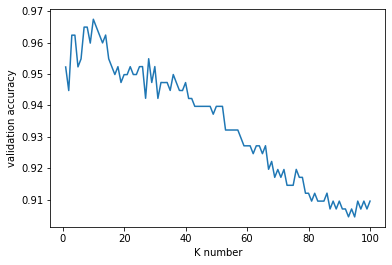

In [ ]:
#standardized data with no feature drop
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)
#X_scaled = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
acc =[]
k = []
for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_scaled,y_train)
  accuracy = cross_val_score(knn, X_scaled, y_train, cv=5)
  acc.append(accuracy.mean())
  k.append(i)
df2 = pd.DataFrame(list(zip(k, acc)),columns=['K','accuracy'])
plt.xlabel('K number')
plt.ylabel('validation accuracy')
plt.plot(k,acc)
sorted_df2 = df2.sort_values("accuracy", ascending=False)
sorted_df2.head(10)

highest accuracy: 0.9699683544303797
column name dropped: mean fractal dimension
highest accuracy: 0.9724683544303797
column name dropped: area error
highest accuracy: 0.9724683544303797
column name dropped: concavity error
highest accuracy: 0.9724683544303797
column name dropped: mean concavity
highest accuracy: 0.9724683544303797
column name dropped: smoothness error
highest accuracy: 0.9724999999999999
column name dropped: worst concavity
highest accuracy: 0.9724999999999999
column name dropped: mean concave points
highest accuracy: 0.9724999999999999
column name dropped: mean texture
highest accuracy: 0.9724999999999999
column name dropped: mean smoothness
highest accuracy: 0.9725000000000001
column name dropped: worst fractal dimension
highest accuracy: 0.975
column name dropped: mean fractal dimension
highest accuracy: 0.975
column name dropped: worst texture
highest accuracy: 0.975
column name dropped: worst concavity
highest accuracy: 0.9724683544303797
column name dropped: fra

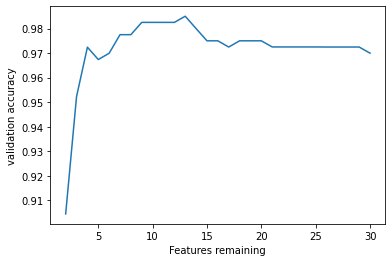

In [ ]:
#backward elimination with standardized data
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
#X_scaled = preprocessing.scale(X_train)
num_fea = 30
max_acc_a = []
num_fea_a = []
for j in range (29):
  max_max_acc = []
  for i in range(num_fea):
    max_acc = []
    X = df.drop(columns=['target',df.columns[i]])
    y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    for k in range(1,30):
      acc = []
      #k_value = []
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_scaled,y_train)
      accuracy = cross_val_score(knn, X_scaled, y_train, cv=5)
      acc.append(accuracy.mean())
      #k_value.append(k)
      max_acc.append(max(acc))
    max_max_acc.append(max(max_acc))
  i_drop = max_max_acc.index(max(max_max_acc))
  max_acc_a.append(max(max_max_acc))
  num_fea_a.append(num_fea)
  print('highest accuracy:',max(max_max_acc))
  df = df.drop(columns = [df.columns[i_drop]])
  print('column name dropped:',df.columns[i_drop])
  num_fea += -1
plt.xlabel('Features remaining')
plt.ylabel('validation accuracy')
plt.plot(num_fea_a,max_acc_a)

In [ ]:
#it is observable that when 18 features are dropped with this algorithm, the validation accuracy achieved the highest at 98.5%.
#Therefore, set the loop equal to 18 and look at the df again

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
#X_scaled = preprocessing.scale(X_train)
num_fea = 30
max_acc_a = []
num_fea_a = []
for j in range (18):
  max_max_acc = []
  for i in range(num_fea):
    max_acc = []
    X = df.drop(columns=['target',df.columns[i]])
    y = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    for k in range(1,30):
      acc = []
      #k_value = []
      knn = neighbors.KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_scaled,y_train)
      accuracy = cross_val_score(knn, X_scaled, y_train, cv=5)
      acc.append(accuracy.mean())
      #k_value.append(k)
      max_acc.append(max(acc))
    max_max_acc.append(max(max_acc))
  i_drop = max_max_acc.index(max(max_max_acc))
  max_acc_a.append(max(max_max_acc))
  num_fea_a.append(num_fea)
  print('highest accuracy:',max(max_max_acc))
  df = df.drop(columns = [df.columns[i_drop]])
  num_fea += -1

highest accuracy: 0.9699683544303797
highest accuracy: 0.9724683544303797
highest accuracy: 0.9724683544303797
highest accuracy: 0.9724683544303797
highest accuracy: 0.9724683544303797
highest accuracy: 0.9724999999999999
highest accuracy: 0.9724999999999999
highest accuracy: 0.9724999999999999
highest accuracy: 0.9724999999999999
highest accuracy: 0.9725000000000001
highest accuracy: 0.975
highest accuracy: 0.975
highest accuracy: 0.975
highest accuracy: 0.9724683544303797
highest accuracy: 0.975
highest accuracy: 0.975
highest accuracy: 0.9799683544303797
highest accuracy: 0.985


In [ ]:
#inspect the new df
df.head()

,mean texture,mean perimeter,mean smoothness,radius error,concavity error,concave points error,fractal dimension error,worst texture,worst perimeter,worst area,worst concavity,worst concave points,target
0,10.38,122.80,0.11840,1.0950,0.05373,0.01587,0.006193,17.33,184.60,2019.0,0.7119,0.2654,0
1,17.77,132.90,0.08474,0.5435,0.01860,0.01340,0.003532,23.41,158.80,1956.0,0.2416,0.1860,0
2,21.25,130.00,0.10960,0.7456,0.03832,0.02058,0.004571,25.53,152.50,1709.0,0.4504,0.2430,0
3,20.38,77.58,0.14250,0.4956,0.05661,0.01867,0.009208,26.50,98.87,567.7,0.6869,0.2575,0
4,14.34,135.10,0.10030,0.7572,0.05688,0.01885,0.005115,16.67,152.20,1575.0,0.4000,0.1625,0


In [ ]:

X = df['mean texture'，	'mean perimeter'，'mean smoothness'	，'radius error'，	'concavity error'	，'concave points error'，	'fractal dimension error'，	'worst texture'	，'worst perimete'，	'worst area'，	'worst concavity'	，'worst concave points']
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
acc =[]
k = []
for i in range(1,30):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_scaled,y_train)
  accuracy = cross_val_score(knn, X_scaled, y_train, cv=5)
  acc.append(accuracy.mean())
  k.append(i)
df2 = pd.DataFrame(list(zip(k, acc)),columns=['K','accuracy'])
plt.xlabel('K number')
plt.ylabel('validation accuracy')
plt.plot(k,acc)
sorted_df2 = df2.sort_values("accuracy", ascending=False)
sorted_df2.head(10)

,K,accuracy
16,17,0.985000
14,15,0.982500
8,9,0.982500
15,16,0.980000
17,18,0.980000
11,12,0.980000
13,14,0.980000
9,10,0.977468
10,11,0.977468
12,13,0.977468


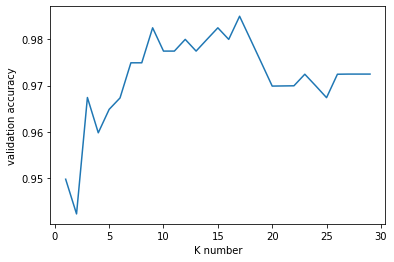

In [ ]:
#Now, the df has only 12 features with validation accuracy of 98.5%. Let's find out what K the algorithm used to achieve this accuracy
#It is found below that highest validation accuracy achieved when K=17
X = df.drop(columns=['target'])
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
acc =[]
k = []
for i in range(1,30):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_scaled,y_train)
  accuracy = cross_val_score(knn, X_scaled, y_train, cv=5)
  acc.append(accuracy.mean())
  k.append(i)
df2 = pd.DataFrame(list(zip(k, acc)),columns=['K','accuracy'])
plt.xlabel('K number')
plt.ylabel('validation accuracy')
plt.plot(k,acc)
sorted_df2 = df2.sort_values("accuracy", ascending=False)
sorted_df2.head(10)

## Part 4: Test Data [1 Mark]

Now that you've created several models, pick your best one (highest accuracy) and apply it to the test dataset you had initially set aside. Discuss. **[1]**

Test accuracy achieved an accuracy of 95.91% using the KNN model with 18 features dropped and with data standardized (As it gives the best results). K = 17 is selected. it is a little lower than the validation accuracy but it is completely acceptable given that the model has never seen the test set.

In [ ]:
X = df.drop(columns=['target'])
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.3, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn1 = neighbors.KNeighborsClassifier(n_neighbors=17)
knn1.fit(X_scaled,y_train)
accuracy = accuracy_score(y_test, knn1.predict(X_test_scaled))
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  95.90643274853801 %


## Part 5: New Dataset [4 Marks]
Find an appropriate classification dataset online and train a KNN model to make predictions.

*   Introduce your dataset. **[1]**

This data sets consists of 3 different types of wines. This dataset is for classification which is suitable for KNN. The dataset has 178 instances and 13 attributes.
*   Create a KNN classifier using the tools you've learned. **[2]**
*   Present your results. **[1]**

We can see from interating through k=1 to k=40 that it is best to use k=6 as it yields the best validation accuracy of 97.2167%. The final test accuracy is 100%
This is probably because this dataset is not big enough and since I used 80:20 split ratio because I want more data to be trained to find best K. It might not get 100% if there is more data included in the test set. I don't see the need of backward elimination of features here since the dataset contains not many rows, and validation and test accuracy is already very high.

Hint: you can find various datasets here: https://www.kaggle.com/datasets and here: https://scikit-learn.org/stable/datasets/index.html#toy-datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, please make sure you are also uploading your dataset so we can fully run your notebook.

In [ ]:
### YOUR CODE HERE ###
from sklearn.datasets import load_wine
data1 = load_wine()
data1

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [ ]:
df_wine = pd.DataFrame(data1.data, columns=data1.feature_names)
df_wine['target'] = data1.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


     K  accuracy
5    6  0.972167
36  37  0.965517
22  23  0.965271
4    5  0.965271
32  33  0.965271
28  29  0.965271
26  27  0.965271
7    8  0.965025
0    1  0.958374
37  38  0.958374
Test Accuracy:  100.0 %


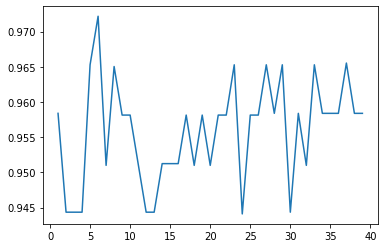

In [ ]:
X = data1.data
y = data1.target
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
acc =[]
k = []
for i in range(1,40):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_scaled,y_train)
  accuracy = cross_val_score(knn, X_scaled, y_train, cv=5)
  acc.append(accuracy.mean())
  k.append(i)
df2 = pd.DataFrame(list(zip(k, acc)),columns=['K','accuracy'])
plt.plot(k,acc)
sorted_df2 = df2.sort_values("accuracy", ascending=False)
print(sorted_df2.head(10))

knn2 = neighbors.KNeighborsClassifier(n_neighbors=6)
knn2.fit(X_scaled,y_train)
accuracy = accuracy_score(y_test, knn2.predict(X_test_scaled))
print ("Test Accuracy: ", accuracy * 100, "%")